In [1]:
# DATA CLEANING
import pandas as pd
df = pd.read_csv('events.csv')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# TRANSFORMATION DU TIMESTAMP EN PLUSIEURS FORMATS DE DATE 
# OK 

from datetime import datetime
df['date'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour
df.head()

,timestamp,visitorid,event,itemid,transactionid,date,year,month,day,dayofweek,hour
0,1433221332117,257597,view,355908,NaN,2015-06-02 07:02:12.117,2015,6,2,1,7
1,1433224214164,992329,view,248676,NaN,2015-06-02 07:50:14.164,2015,6,2,1,7
2,1433221999827,111016,view,318965,NaN,2015-06-02 07:13:19.827,2015,6,2,1,7
3,1433221955914,483717,view,253185,NaN,2015-06-02 07:12:35.914,2015,6,2,1,7
4,1433221337106,951259,view,367447,NaN,2015-06-02 07:02:17.106,2015,6,2,1,7


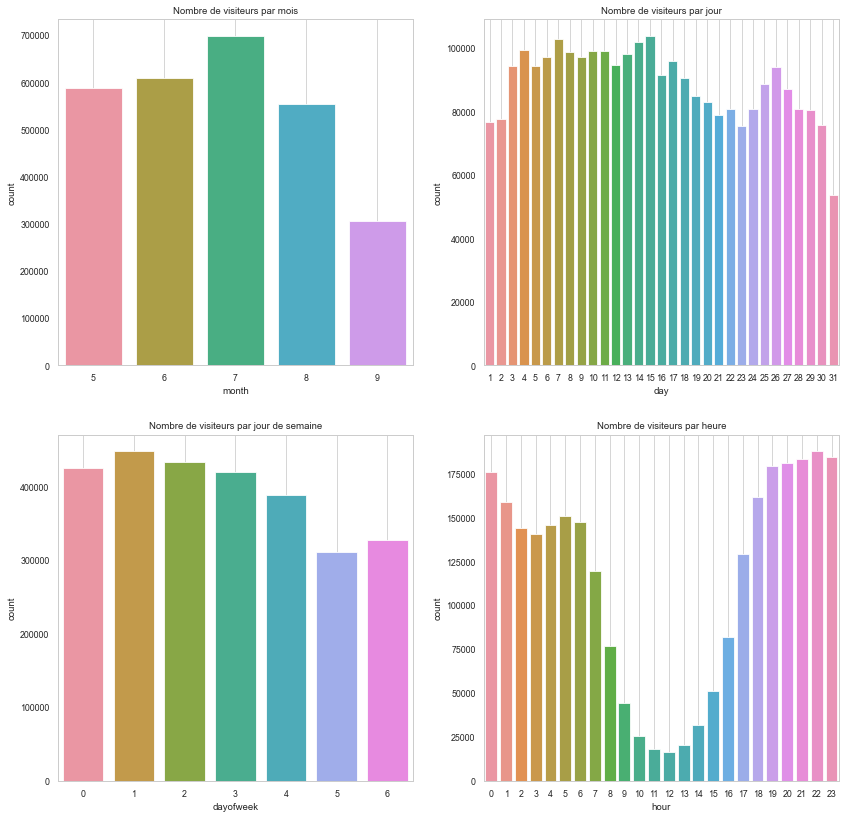

In [3]:
# PREMIERE VISUALISATION DES DONNES

# Style 
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette(['#39A7D0','#36ADA4'])

# Format 
plt.figure(figsize = (14,14))

# Visiteurs par mois
plt.subplot(221)
sns.countplot(x='month', data=df)
plt.title('Nombre de visiteurs par mois')
plt.grid()

# Visiteurs par jour
plt.subplot(222)
sns.countplot(x='day', data=df)
plt.title('Nombre de visiteurs par jour')
plt.grid()

# Visiteurs par jour de semaine
plt.subplot(223)
sns.countplot(x='dayofweek', data=df)
plt.title('Nombre de visiteurs par jour de semaine')
plt.grid()

# Visiteurs par heure
plt.subplot(224)
sns.countplot(x='hour', data=df)
plt.title('Nombre de visiteurs par heure')
plt.grid()

In [37]:
######## verif avec Greg ? ######## METTRE EN ANNEXE

import statsmodels.api

print("On s'intéresse à la relation entre la variable catégorielle 'event' et la variable transactionid, pour savoir si le comportement du consomateur a un impact sur les transactions.") 

print("Relation entre la variable continue transactionid et la variable catégorielle event.")
print("Pour étudier ce type de corrélation on a recours à l’analyse de la variance (ANOVA).")

result = statsmodels.formula.api.ols('transactionid ~ event', data = df).fit()
table_eventXtransactionid = statsmodels.api.stats.anova_lm(result)

print("df renseigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.")
print("Celle-ci est supérieure à 50%. On ne peut donc pas conclure à une relation d'influence entre la var. event et la var. transactionid ")

print("On voit qu'il n'y a pas de relation entre la variable 'event' et la variable 'transactionid'.")
print("On va donc découper la variable catégorielle event pour voir si à l'intérieur de chaque comportement (nb_view, nb_addtocart, nb_transaction),") 
print("si il y a des relations entre ces nouvelles variables quantitatives")

table_eventXtransactionid

On s'intéresse à la relation entre la variable catégorielle 'event' et la variable transactionid, pour savoir si le comportement du consomateur a un impact sur les transactions.
Relation entre la variable continue transactionid et la variable catégorielle event.
Pour étudier ce type de corrélation on a recours à l’analyse de la variance (ANOVA).
df renseigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.
Celle-ci est supérieure à 50%. On ne peut donc pas conclure à une relation d'influence entre la var. event et la var. transactionid 
On voit qu'il n'y a pas de relation entre la variable 'event' et la variable 'transactionid'.
On va donc découper la variable catégorielle event pour voir si à l'intérieur de chaque comportement (nb_view, nb_addtocart, nb_transaction),
si il y a des relations entre ces nouvelles variables quantitatives


,df,sum_sq,mean_sq,F,PR(>F)
event,2.0,3.484181e+07,1.742090e+07,0.669982,0.511728
Residual,22455.0,5.838761e+11,2.600205e+07,NaN,NaN


In [5]:
######## METTRE EN ANNEXE

result = statsmodels.formula.api.ols('itemid ~ event', data = df).fit()
table_eventXitemid = statsmodels.api.stats.anova_lm(result)

print("df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.")
print("Cette fois-ci, la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle event n'influe pas sur itemid.")

table_eventXitemid

df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.
Cette fois-ci, la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle event n'influe pas sur itemid.


,df,sum_sq,mean_sq,F,PR(>F)
event,2.0,4.217666e+11,2.108833e+11,11.710356,0.000008
Residual,2756098.0,4.963256e+16,1.800827e+10,NaN,NaN


In [ ]:
# Pas le choix de copier tous les codes ??? 

In [3]:
####  TABLEAU TRANSACTIONS - EVENTS #####

# Créer 2 tableaux transaction et tous les events
non_transactions = df
transactions = df.loc[df.event == "transaction"]

# Merger les deux tableaux sur visitorid
inner_merged_total = pd.merge(transactions, non_transactions, on=["visitorid"], how="inner")

# Trier le tableau mergé par visitorid, date d'event, itemid
inner_merged_total = inner_merged_total.sort_values(by=['visitorid','date_y','itemid_x'])

# Calculer le time-diff entre transaction est event et le convertir en second
inner_merged_total['event_diff_second'] = inner_merged_total['date_x'] - inner_merged_total['date_y']
inner_merged_total['event_diff_second'] = inner_merged_total['event_diff_second'] / np.timedelta64(1, 's')

# Limiter en 24h
transaction_24h = inner_merged_total.loc[inner_merged_total['event_diff_second'] < 86400]
transaction_made_24h = transaction_24h.loc[inner_merged_total['itemid_x'] == inner_merged_total['itemid_y']]

# Supprimer certaines colonnes
transaction_made_24h = transaction_made_24h.drop(['timestamp_x','timestamp_y','transactionid_y'], axis=1)

# Supprimer des events après transactions 
transaction_made_24h = transaction_made_24h.loc[transaction_made_24h.event_diff_second >= 0]
transaction_made_24h

# VERIFICATION
#transaction_made_24h.loc[transaction_made_24h.transactionid_x == 9725]


,visitorid,event_x,itemid_x,transactionid_x,date_x,year_x,month_x,day_x,dayofweek_x,hour_x,event_y,itemid_y,date_y,year_y,month_y,day_y,dayofweek_y,hour_y,event_diff_second
10906025,172,transaction,10034,9725.0,2015-08-15 03:29:01.686,2015,8,15,5,3,view,10034,2015-08-15 02:49:12.998,2015,8,15,5,2,2388.688
10906024,172,transaction,10034,9725.0,2015-08-15 03:29:01.686,2015,8,15,5,3,addtocart,10034,2015-08-15 02:50:16.912,2015,8,15,5,2,2324.774
10905985,172,transaction,465522,9725.0,2015-08-15 03:29:01.230,2015,8,15,5,3,view,465522,2015-08-15 03:06:38.438,2015,8,15,5,3,1342.792
10905996,172,transaction,465522,9725.0,2015-08-15 03:29:01.230,2015,8,15,5,3,addtocart,465522,2015-08-15 03:13:39.691,2015,8,15,5,3,921.539
10905993,172,transaction,465522,9725.0,2015-08-15 03:29:01.230,2015,8,15,5,3,addtocart,465522,2015-08-15 03:13:48.324,2015,8,15,5,3,912.906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10554877,1407110,transaction,360922,3851.0,2015-08-05 01:11:25.624,2015,8,5,2,1,view,360922,2015-08-05 01:03:14.670,2015,8,5,2,1,490.954
10554878,1407110,transaction,360922,3851.0,2015-08-05 01:11:25.624,2015,8,5,2,1,addtocart,360922,2015-08-05 01:05:35.724,2015,8,5,2,1,349.900
10554883,1407110,transaction,360922,3851.0,2015-08-05 01:11:25.624,2015,8,5,2,1,transaction,360922,2015-08-05 01:11:25.624,2015,8,5,2,1,0.000
11786291,1407398,transaction,218917,10009.0,2015-07-07 05:47:15.969,2015,7,7,1,5,addtocart,218917,2015-07-07 05:34:38.082,2015,7,7,1,5,757.887


In [4]:
### TABLEAU TIME SUM TRANSACTIONS ###

# Créer un tableau avec transactionid, visitorid et date d'evenement
calcul_time = pd.DataFrame(transaction_made_24h,columns=['transactionid_x','visitorid','date_y'])

# Calculer time diff entre le 1er evenement et la transaction (== le dernier evenement)
g = calcul_time.groupby('transactionid_x', group_keys=False)
time_sum_tran = pd.DataFrame(g['date_y'].apply(lambda x: (x.iat[-1] - x.iat[0])/ np.timedelta64(1, 's'))) # Explication ? 
time_sum_tran = time_sum_tran.rename(columns={"date_y": "sum_time_second"})

# Convertir second en minute et en heure
time_sum_tran['sum_time_minute'] = round(time_sum_tran['sum_time_second']/60)
time_sum_tran['sum_time_hour'] = round(time_sum_tran['sum_time_second']/3600,2)
time_sum_tran

# VERIFICATION
#transaction_made_24h.loc[transaction_made_24h.transactionid_x == 17648]
#transaction_made_24h.loc[transaction_made_24h.transactionid_x == 9725]

,sum_time_second,sum_time_minute,sum_time_hour
transactionid_x,,,
0.0,530.511,9.0,0.15
1.0,559.408,9.0,0.16
2.0,189.096,3.0,0.05
3.0,0.000,0.0,0.00
4.0,299.570,5.0,0.08
...,...,...,...
17667.0,430.500,7.0,0.12
17668.0,159.337,3.0,0.04
17669.0,156.841,3.0,0.04


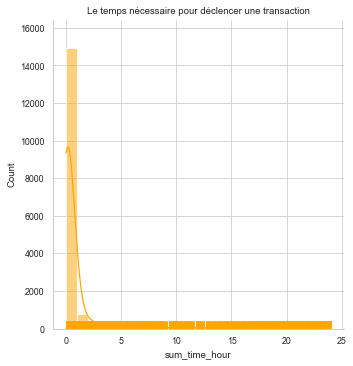

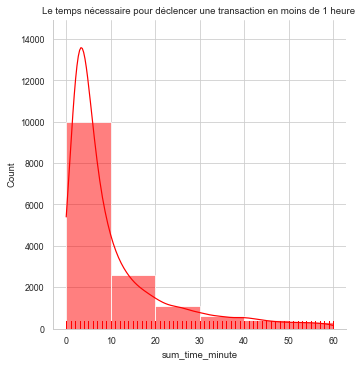

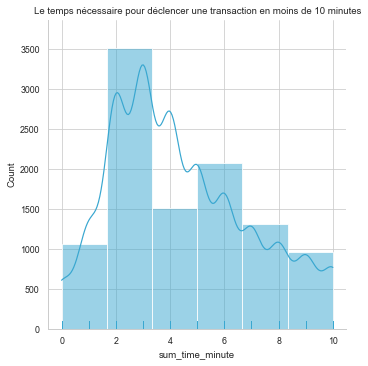

In [38]:
##### DATAVIZ ######
# Ok 

# Temps de Transactions moins d'une heure
sum_tran_1h = time_sum_tran.loc[round(time_sum_tran['sum_time_minute']) <= 60]

# Temps de transactions moins de 10 minutes
sum_trans_10min = sum_tran_1h.loc[round(sum_tran_1h['sum_time_minute']) <= 10]

sns.displot(time_sum_tran['sum_time_hour'], bins=24, kde=True, rug=True, color='orange')
plt.title('Le temps nécessaire pour déclencer une transaction')

sns.displot(sum_tran_1h['sum_time_minute'], bins=6, kde=True, rug=True, color='red')
plt.title('Le temps nécessaire pour déclencer une transaction en moins de 1 heure ')
          
sns.displot(sum_trans_10min['sum_time_minute'], bins=6, kde=True, rug=True)
plt.title('Le temps nécessaire pour déclencer une transaction en moins de 10 minutes');

In [6]:
## TABLEAU TIME SUM PAR VISITEURS ###
# Calculer le sum des evenements par transaction
v = calcul_time.groupby('visitorid', group_keys=False)
time_sum_visitor = pd.DataFrame(v['date_y'].apply(lambda x: (x.iat[-1] - x.iat[0])/ np.timedelta64(1, 's')))
time_sum_visitor = time_sum_visitor.rename(columns={"date_y": "sum_time_second"})
time_sum_visitor

# Convertir second en minute et en heure
time_sum_visitor['sum_time_minute'] = round(time_sum_visitor['sum_time_second']/60)
time_sum_visitor['sum_time_hour'] = round(time_sum_visitor['sum_time_second']/3600,2)
time_sum_visitor

,sum_time_second,sum_time_minute,sum_time_hour
visitorid,,,
172,2388.688,40.0,0.66
186,400.517,7.0,0.11
264,1532.878,26.0,0.43
419,7525.939,125.0,2.09
539,216.985,4.0,0.06
...,...,...,...
1406787,168.285,3.0,0.05
1406981,261.665,4.0,0.07
1407070,608.335,10.0,0.17


In [7]:
##### TABLEAU STATS PAR VISITEURS ####
# Nombre de visites
stats = df.groupby('visitorid').agg({'visitorid':'count'})
stats = stats.rename(columns={"visitorid": "nb_visites"})

# Nombre de views par visitorid
view = df.loc[df['event'] == 'view'].groupby('visitorid').agg({'visitorid':'count'})
view = view.rename(columns={"visitorid": "nb_views"})

# Nombre de addtocarts par visitorid
addtocart = df.loc[df['event'] == 'addtocart'].groupby('visitorid').agg({'visitorid':'count'})
addtocart = addtocart.rename(columns={"visitorid": "nb_addtocarts"})

#### STATS PAR VISITEUR #####
# Nombre de transactions par visitorid
transaction = df.loc[df['event']=='transaction'].groupby(by=['visitorid','transactionid'], as_index=False).agg({'itemid': 'count'})
all_transaction=transaction.groupby(by='visitorid').agg({'transactionid': 'count'}).rename(columns={"transactionid": "nb_transactions"})

# Merge les dataframes
stats = pd.merge(stats, view, left_index=True, right_index=True, how='left')
stats = pd.merge(stats, addtocart, left_index=True, right_index=True, how='left')
stats = pd.merge(stats, all_transaction, left_index=True, right_index=True, how='left')

# Merge items
items = df.loc[df['transactionid'] > 0].groupby(by='visitorid').agg({'itemid': 'count'})
stats = pd.merge(stats, items, left_index=True, right_index=True, how='left')
stats = stats.rename(columns={"itemid": "nb_items_bought"})

# Merge avec temps moyen passé
stats = pd.merge(stats, time_sum_visitor, left_index=True, right_index=True, how='left')
stats = stats.fillna(0)
stats = stats.sort_values('nb_transactions', ascending=False)

# Supprimer le visiteur 1150086
stats = stats.drop(stats.head(1).index)
stats = stats.sort_values('sum_time_minute', ascending=False)

# Temps moyen transaction 
stats['mean_time_tran_sec'] = stats['sum_time_second'] / stats['nb_transactions']
stats = stats.fillna(0)
stats['mean_time_tran_minute'] = round(stats['mean_time_tran_sec']/60)
stats['mean_time_tran_hour'] = round(stats['mean_time_tran_sec']/3600,2)

# VERIFICATION
#stats.loc[stats.mean_time_tran_sec < 0]

stats

,nb_visites,nb_views,nb_addtocarts,nb_transactions,nb_items_bought,sum_time_second,sum_time_minute,sum_time_hour,mean_time_tran_sec,mean_time_tran_minute,mean_time_tran_hour
visitorid,,,,,,,,,,,
1165148,858,802.0,29.0,23.0,27.0,1.105799e+07,184300.0,3071.66,4.807822e+05,8013.0,133.55
899857,528,342.0,114.0,51.0,72.0,1.104369e+07,184062.0,3067.69,2.165430e+05,3609.0,60.15
895999,2474,2368.0,56.0,44.0,50.0,1.046182e+07,174364.0,2906.06,2.377685e+05,3963.0,66.05
198153,536,494.0,32.0,10.0,10.0,1.038605e+07,173101.0,2885.01,1.038605e+06,17310.0,288.50
475172,135,108.0,14.0,8.0,13.0,1.029387e+07,171565.0,2859.41,1.286734e+06,21446.0,357.43
...,...,...,...,...,...,...,...,...,...,...,...
1389317,1,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.00,0.000000e+00,0.0,0.00
1389318,1,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.00,0.000000e+00,0.0,0.00
1389319,1,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.00,0.000000e+00,0.0,0.00


In [7]:
stats.loc[(stats['nb_transactions'])==1] # Ok verif 

,nb_visites,nb_views,nb_addtocarts,nb_transactions,nb_items_bought,sum_time_second,sum_time_minute,sum_time_hour,mean_time_tran_sec,mean_time_tran_minute,mean_time_tran_hour
visitorid,,,,,,,,,,,
195919,5,3.0,1.0,1.0,1.0,86389.677,1440.0,24.00,86389.677,1440.0,24.00
1101747,120,99.0,14.0,1.0,7.0,86346.403,1439.0,23.99,86346.403,1439.0,23.99
1134854,19,15.0,2.0,1.0,2.0,86312.917,1439.0,23.98,86312.917,1439.0,23.98
169902,6,4.0,1.0,1.0,1.0,86324.138,1439.0,23.98,86324.138,1439.0,23.98
94751,12,8.0,3.0,1.0,1.0,86350.135,1439.0,23.99,86350.135,1439.0,23.99
...,...,...,...,...,...,...,...,...,...,...,...
1252195,3,2.0,0.0,1.0,1.0,0.000,0.0,0.00,0.000,0.0,0.00
1338933,8,2.0,5.0,1.0,1.0,0.000,0.0,0.00,0.000,0.0,0.00
116728,1,0.0,0.0,1.0,1.0,0.000,0.0,0.00,0.000,0.0,0.00


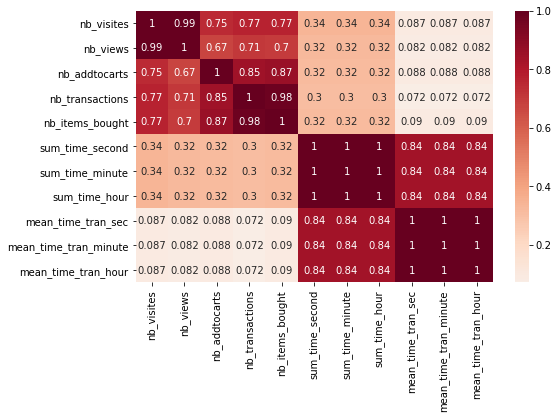

In [8]:
# Matrice de corrélation sur stats 
# OK 

plt.figure(figsize=(8,5))
sns.heatmap(stats.corr(), annot=True, cmap='RdBu_r', center=0);


Relation entre les variables nombre de addtocarts et nombre de transactions


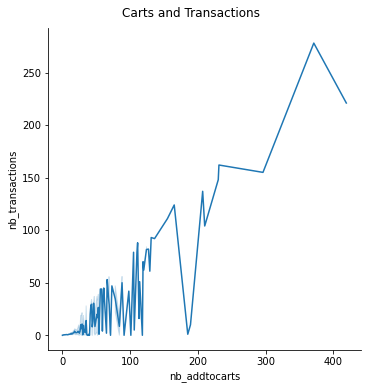

In [9]:
# Verif OK 

print("Relation entre les variables nombre de addtocarts et nombre de transactions")
g = sns.relplot(x="nb_addtocarts", 
                y="nb_transactions",
                data=stats,
                kind="line",
                markers=True,
                dashes=False)
g.fig.suptitle("Carts and Transactions",y=1.03)
plt.show()

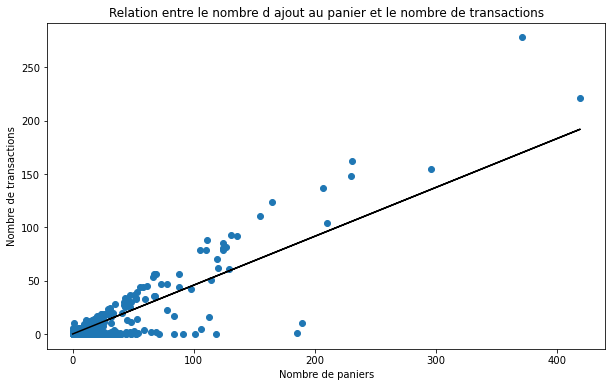

In [17]:
# Nouveau graph 
# On va faire un groupement des visitors qui achètent le plus 

nb_addtocarts=stats[['nb_addtocarts']]
#nb_addtocarts

nb_transactions=stats[['nb_transactions']]
#nb_transactions

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_validate

lr=LinearRegression()
lr.fit(nb_addtocarts, nb_transactions)
cross_validate(lr, nb_addtocarts, nb_transactions, return_train_score=True, cv=4)['test_score'].mean()

pred_t = lr.predict(nb_addtocarts)
residus = pred_t - nb_transactions

plt.figure(figsize=(10,6))
plt.scatter(x='nb_addtocarts', y='nb_transactions', data=stats)
plt.xlabel('Nombre de paniers')
plt.ylabel('Nombre de transactions')
plt.title('Relation entre le nombre d ajout au panier et le nombre de transactions')
plt.plot(nb_addtocarts, pred_t, color="black");

In [18]:
# DATAVIZ 3 - Stats
# Calculate Pearson's correlation
from scipy.stats import pearsonr

pd.DataFrame(pearsonr(stats['nb_addtocarts'], stats['nb_transactions']), index=['pearson_coeff', 'p-value'], columns=['Relation entre nb_addtocarts et nb_transactions'])

,Relation entre nb_addtocarts et nb_transactions
pearson_coeff,0.848033
p-value,0.000000


In [19]:
pd.DataFrame(pearsonr(stats['nb_views'], stats['nb_transactions']), index=['pearson_coef','p-value'], columns = ['Relation entre nb_views et nb_transactions'])


,Relation entre nb_views et nb_transactions
pearson_coef,0.708708
p-value,0.000000


In [21]:
# SUIVI VISITOR & ITEM ==> les actions 

visit_view = df.loc[df['event'] == 'view'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})
visit_view = visit_view.rename(columns={"event": "nb_view"})
visit_view.sort_values('nb_view', ascending=False)

# Nombre de paniers par visitorid, par item 
visit_add = df.loc[df['event'] == 'addtocart'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})
visit_add = visit_add.rename(columns={"event": "nb_addtocart"})
visit_add.sort_values('nb_addtocart', ascending=False)

# Nombre de transacs par visitorid, par item 
visit_transac = df.loc[df['event'] == 'transaction'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})
visit_transac = visit_transac.rename(columns={"event": "nb_transac"})
visit_transac.sort_values('nb_transac', ascending=False)

visit_item=pd.merge(visit_view, visit_add, how='outer')
visit_item=pd.merge(visit_item, visit_transac, how='outer')
visit_item.sort_values(['nb_transac','nb_addtocart', 'nb_view','visitorid', 'itemid'], ascending=[False, False, False, False, False])
visit_item.sort_values(by='nb_transac', ascending=False)

,visitorid,itemid,nb_view,nb_addtocart,nb_transac
231334,152963,119736,18.0,NaN,14.0
806384,530559,119736,19.0,9.0,9.0
1003673,660393,224549,9.0,6.0,5.0
1782155,1172087,312728,6.0,NaN,5.0
2070162,1365706,227311,4.0,5.0,5.0
...,...,...,...,...,...
2144647,1407512,54141,NaN,1.0,NaN
2144648,1407512,107832,NaN,1.0,NaN
2144649,1407512,241408,NaN,1.0,NaN
2144650,1407512,290723,NaN,1.0,NaN


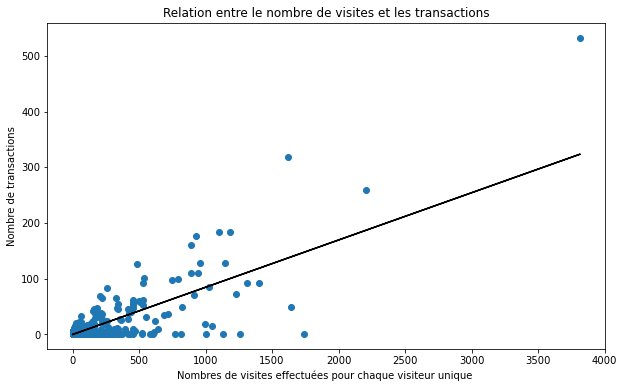

In [35]:
# Ok DATAVIZ relation entre le nb de visites par visiteurs et le nb de transactions 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_validate

# On va faire un groupement des visitors qui achètent le plus 
visitor_transaction=visit_item.groupby(by='visitorid').agg({'nb_transac':'count', 'visitorid':'count'}).rename(columns={'visitorid':'nb_de_visit'})

nb_transactions=visitor_transaction['nb_transac']
view_by_visitor=visitor_transaction[['nb_de_visit']]

slr=LinearRegression()
slr.fit(view_by_visitor, nb_transactions)
cross_validate(slr, view_by_visitor, nb_transactions, return_train_score=True, cv=4)['test_score'].mean()

pred_transac = slr.predict(view_by_visitor)
residus = pred_transac - nb_transactions

plt.figure(figsize=(10,6))
plt.scatter(x='nb_de_visit', y='nb_transac', data=visitor_transaction)
plt.xlabel('Nombres de visites effectuées pour chaque visiteur unique ')
plt.ylabel('Nombre de transactions')
plt.title('Relation entre le nombre de visites et les transactions');
plt.plot(view_by_visitor, pred_transac, color="black");


In [24]:
print("la p-value < 5%, le coefficient est proche de 1, il y a une corrélation entre les deux variables.")
print("Lorsque le nombre de view augmentent les transactions augmentent aussi.")

pd.DataFrame(pearsonr(visitor_transaction['nb_de_visit'],visitor_transaction['nb_transac']), index = ['pearson_coeff','p-value'], columns = ['resultat_test'])


la p-value < 5%, le coefficient est proche de 1, il y a une corrélation entre les deux variables.
Lorsque le nombre de view augmentent les transactions augmentent aussi.


,resultat_test
pearson_coeff,0.777609
p-value,0.000000


In [46]:
# NETTOYAGE DES NANS sur la bdd items 

# Nombre de visites par itemsid
items = df.groupby('itemid').agg({'visitorid':'count'})
items = items.rename(columns={"visitorid": "nb_visites"})

# Nombre de views par itemid
items_view = df.loc[df['event'] == 'view'].groupby('itemid').agg({'itemid':'count'}) #df.loc[df['itemid'] == 9]
items_view = items_view.rename(columns={"itemid": "nb_views"})

# Nombre de addtocarts par itemid
items_addtocart = df.loc[df['event'] == 'addtocart'].groupby('itemid').agg({'itemid':'count'})
items_addtocart = items_addtocart.rename(columns={"itemid": "nb_addtocarts"})

# Nombre de transactions par itemid
items_transaction = df.loc[df['event'] == 'transaction'].groupby('itemid').agg({'itemid':'count'})
items_transaction = items_transaction.rename(columns={"itemid": "nb_transactions"})

# Merge dataframes
items = pd.merge(items, items_view, left_index=True, right_index=True, how='left')
items = pd.merge(items, items_addtocart, left_index=True, right_index=True, how='left')
items = pd.merge(items, items_transaction, left_index=True, right_index=True, how='left')
items

# Remplaçons les Nans par 0 
items = items.fillna(0)
# Vérifions que les Nans ont bien été remplacé
items.isnull().sum(axis = 0)


nb_visites         0
nb_views           0
nb_addtocarts      0
nb_transactions    0
dtype: int64

In [80]:
### TABLEAU TOP 500 PRODUITS ####
# SELECT 500 PRODUITS PLUS ACHETES, PLUS MIS AU PANIER, PLUS VUS
n_produits = 500

# les n_produits produits plus achetés
top_produits_vendus = items.sort_values(by='nb_transactions', ascending=False).head(n_produits)
top_produits_vendus['cat_top_vendus'] = "1"
top_produits_vendus = top_produits_vendus.drop(columns=['nb_visites', 'nb_views', 'nb_addtocarts'])

# les n_produits produits plus mis au panier
top_produits_paniers = items.sort_values(by='nb_addtocarts', ascending=False).head(n_produits)
top_produits_paniers['cat_top_mis_panier'] = "1"
top_produits_paniers = top_produits_paniers.drop(columns=['nb_visites', 'nb_views', 'nb_transactions'])

# les n_produits produits plus vus
top_produits_vus = items.sort_values(by='nb_views', ascending=False).head(n_produits)
top_produits_vus['cat_top_vus'] = "1"
top_produits_vus = top_produits_vus.drop(columns=['nb_visites', 'nb_addtocarts', 'nb_transactions'])

# Merge les 3 dataframes OUTER
top_produits = pd.merge(top_produits_vendus, top_produits_paniers, left_index=True, right_index=True, how='outer')
top_produits = pd.merge(top_produits, top_produits_vus, left_index=True, right_index=True, how='outer')

top_produits = top_produits[['cat_top_vus', 'cat_top_mis_panier', 'cat_top_vendus']]
top_produits = top_produits.fillna(0)
top_produits

,cat_top_vus,cat_top_mis_panier,cat_top_vendus
itemid,,,
546,1,1,1
829,0,1,0
869,1,1,1
1684,0,0,1
2416,0,1,1
...,...,...,...
465511,1,1,0
465522,0,1,1
465751,0,0,1


C:\Users\ocean\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


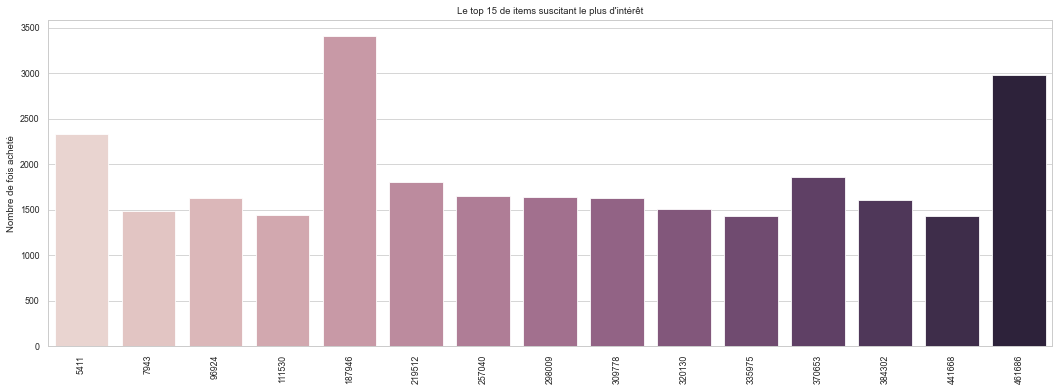

In [70]:
# création d'un graphique avec les 15 articles les plus actionnés (view, add, transac)

item_counts=df['itemid'].value_counts().sort_values(ascending=False).iloc[0:15]

plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Nombre de fois acheté")
plt.title("Le top 15 de items suscitant le plus d'intérêt");
plt.xticks(rotation=90);

In [40]:
# Si on veut avoir les items achetés il faut pas d'abord trier par itemid qui sont achetés ? 
# Car itemid value_counts se sont tous les items peu importe leur statut view, add ou transac ? 
# Dans le code en haut Soo a isolé la base qu'avec les transactions 

#### TABLEAU ITEMS ####
# Nombre de visiteurs par itemsid
items = df.groupby('itemid').agg({'visitorid':'count'})
items = items.rename(columns={"visitorid": "nb_visites"})

# Nombre de views par itemid
items_view = df.loc[df['event'] == 'view'].groupby('itemid').agg({'itemid':'count'}) #df.loc[df['itemid'] == 9]
items_view = items_view.rename(columns={"itemid": "nb_views"})

# Nombre de addtocarts par itemid
items_addtocart = df.loc[df['event'] == 'addtocart'].groupby('itemid').agg({'itemid':'count'})
items_addtocart = items_addtocart.rename(columns={"itemid": "nb_addtocarts"})

# Nombre de transactions par itemid
items_transaction = df.loc[df['event'] == 'transaction'].groupby('itemid').agg({'itemid':'count'})
items_transaction = items_transaction.rename(columns={"itemid": "nb_transactions"})

# Merge dataframes
items = pd.merge(items, items_view, left_index=True, right_index=True, how='left')
items = pd.merge(items, items_addtocart, left_index=True, right_index=True, how='left')
items = pd.merge(items, items_transaction, left_index=True, right_index=True, how='left')

# Merge avec temps moyen passé
items = items.fillna(0)
items = items.sort_values('nb_transactions', ascending=False)
items

items.head(15)

,nb_visites,nb_views,nb_addtocarts,nb_transactions
itemid,,,,
461686,2978,2539.0,306.0,133.0
119736,893,752.0,44.0,97.0
213834,402,293.0,17.0,92.0
312728,1155,947.0,162.0,46.0
7943,1489,1346.0,97.0,46.0
445351,1073,939.0,89.0,45.0
48030,1122,986.0,95.0,41.0
248455,665,575.0,52.0,38.0
420960,894,796.0,60.0,38.0


C:\Users\ocean\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


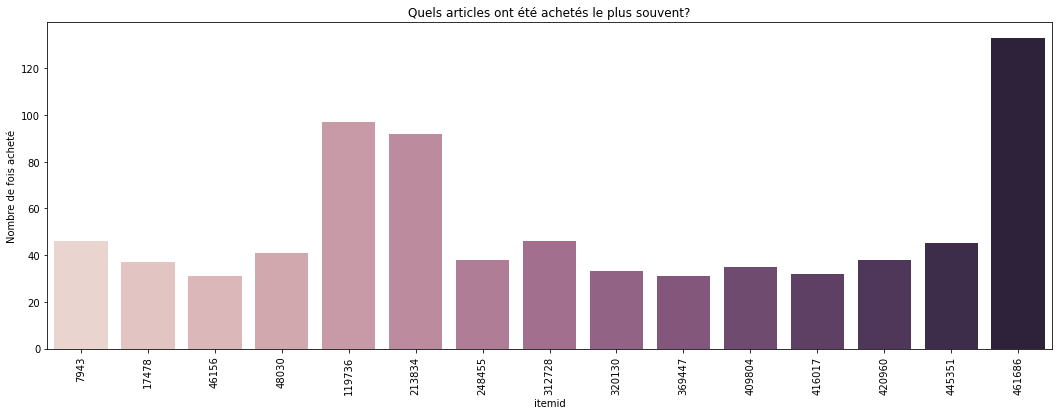

In [41]:
# Le top 15 des produits les plus achetés / Il faut ranker 

item_buy_test=items.head(15)
plt.figure(figsize=(18,6))
sns.barplot(item_buy_test.index, item_buy_test.nb_transactions,palette=sns.cubehelix_palette(15))
plt.ylabel("Nombre de fois acheté")
plt.title("Quels articles ont été achetés le plus souvent?");
plt.xticks(rotation=90);

In [32]:
item_counts

0     3412
1     2978
2     2334
3     1854
4     1800
5     1647
6     1642
7     1633
8     1628
9     1608
10    1507
11    1489
12    1447
13    1433
14    1428
Name: itemid, dtype: int64

Nous pouvons constater que l'item 461686, produit star, est plus populaire au mois de juillet et août
l'item 119736 est plus populaire au mois de juin et août
l'item 213834 est plus populaire au mois de juillet
l'item 312728 est plus populaire durant l'été


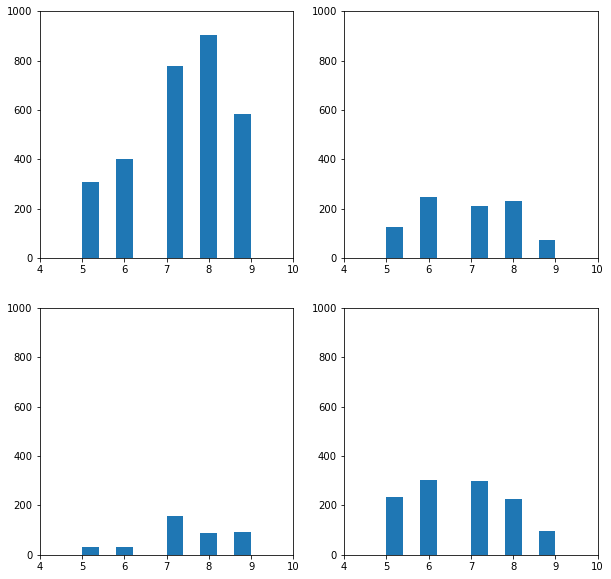

In [24]:
# Etudier l'évolution des 4 items les plus achetés par rapport au mois 
# Retravailler les graphs
# Il faut les labels, les axex, 

max_item_1 = df.loc[df['itemid']==461686] 
max_item_2 = df.loc[df['itemid']==119736]
max_item_3 = df.loc[df['itemid']==213834]
max_item_4 = df.loc[df['itemid']==312728]

fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plt.axis([4,10,0,1000])
plt.hist(max_item_1.month);

plt.subplot(222)
plt.axis([4,10,0,1000])
plt.hist(max_item_2.month);

plt.subplot(223)
plt.axis([4,10,0,1000])
plt.hist(max_item_3.month);

plt.subplot(224)
plt.axis([4,10,0,1000])
plt.hist(max_item_4.month);

print("Nous pouvons constater que l'item 461686, produit star, est plus populaire au mois de juillet et août")
print("l'item 119736 est plus populaire au mois de juin et août")
print("l'item 213834 est plus populaire au mois de juillet")
print("l'item 312728 est plus populaire durant l'été")

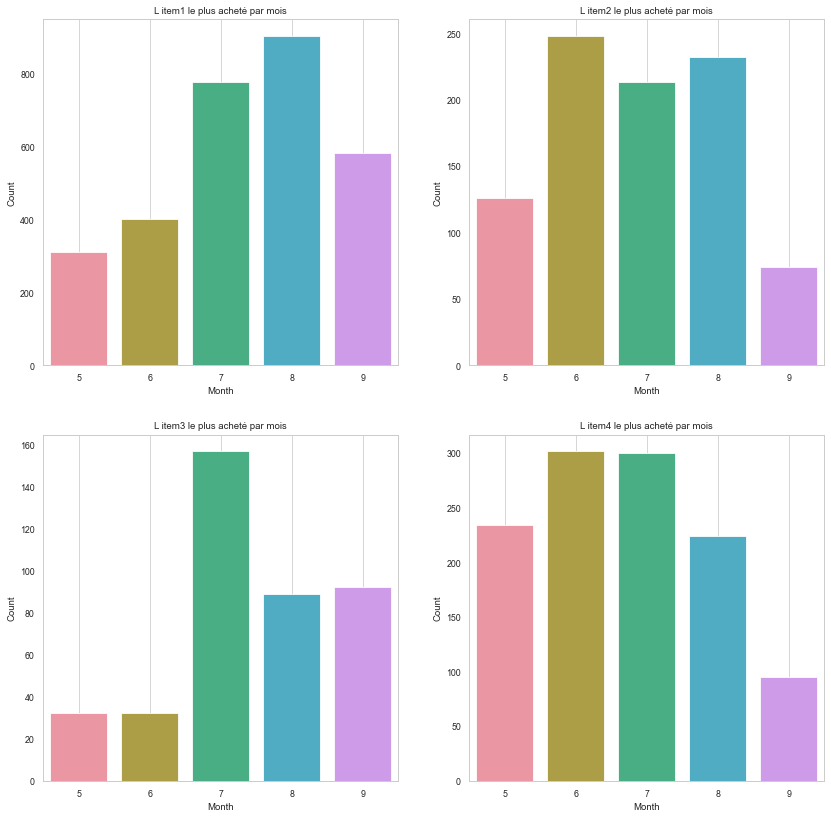

In [53]:
# Style 
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette(['#39A7D0','#36ADA4'])

# Format 
plt.figure(figsize = (14,14))

max_item_1 = df.loc[df['itemid']==461686] 
max_item_2 = df.loc[df['itemid']==119736]
max_item_3 = df.loc[df['itemid']==213834]
max_item_4 = df.loc[df['itemid']==312728]

# Item1 par mois
plt.subplot(221)
sns.countplot(x='month', data=max_item_1)
plt.title('L item1 le plus acheté par mois')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid()

# Item2 par mois
plt.subplot(222)
sns.countplot(x='month', data=max_item_2)
plt.title('L item2 le plus acheté par mois')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid()

# Item3par mois
plt.subplot(223)
sns.countplot(x='month', data=max_item_3)
plt.title('L item3 le plus acheté par mois')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid()

# Item4 par mois
plt.subplot(224)
sns.countplot(x='month', data=max_item_4)
plt.title('L item4 le plus acheté par mois')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid()

In [51]:
item_buy_213834= df.loc[(df['event'] == 'transaction') & (df['itemid'] == 213834)].groupby(by=['month','itemid'], as_index=False).agg({'event':'count'}).rename(columns={"itemid": "item_213834"})

In [52]:
item_buy_213834

,month,item_213834,event
0,6,213834,3
1,7,213834,51
2,8,213834,13
3,9,213834,25


In [25]:

items = items.fillna(0)
print("p-value = 0<0.05 On rejette H0 : les deux variables ne sont donc pas indépendantes")
print("coefficient de pearson = 0.540263 : Les deux variables sont moyennement corrélées.")
pd.DataFrame(pearsonr(items['nb_views'], items['nb_transactions']), index=['pearson_coef','p-value'], columns = ['resultat_test_items'])


p-value = 0<0.05 On rejette H0 : les deux variables ne sont donc pas indépendantes
coefficient de pearson = 0.540263 : Les deux variables sont moyennement corrélées.


,resultat_test_items
pearson_coef,0.540263
p-value,0.000000


In [27]:
# Si un produit est dans les 3 catégories plus vus, plus mis, plus vendus, 
# le produit sera classé 3 étoiles dans cat_produits_recommandations
top_produits = top_produits.fillna(0)
top_produits['stars_produits_recommandations'] = top_produits['cat_produits_plus_vus'].astype(int) + top_produits['cat_produits_plus_mis_panier'].astype(int) + top_produits['cat_produits_plus_vendus'].astype(int)

stars_produits = top_produits.sort_values(by='stars_produits_recommandations', ascending=False)
produits_plus_vendus = top_produits.sort_values(by='nb_transactions', ascending=False)


C:\Users\ocean\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


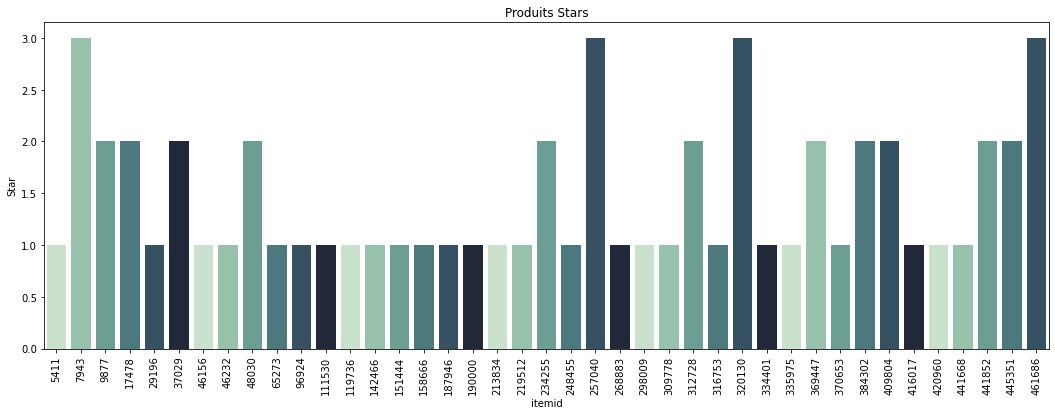

In [28]:
# Moteur de recommandation : Calculs Nombres de transaction, de view, d'add to cart
# A voir ce graph ==> le mettre en ouverture (manque de temps)

plt.figure(figsize=(18,6))
sns.barplot(stars_produits.index, stars_produits.stars_produits_recommandations, palette=sns.cubehelix_palette(rot=-.4))
plt.ylabel("Star")
plt.title("Produits Stars");
plt.xticks(rotation=90);



In [38]:
item_buy_test=items.head(15)
plt.figure(figsize=(18,6))
sns.barplot(item_buy_test.index, item_buy_test.nb_transactions,palette=sns.cubehelix_palette(15))
plt.ylabel("Nombre de fois acheté")
plt.title("Quels articles ont été achetés le plus souvent?");
plt.xticks(rotation=90);

AttributeError: 'DataFrame' object has no attribute 'nb_transactions'

<Figure size 1296x432 with 0 Axes>

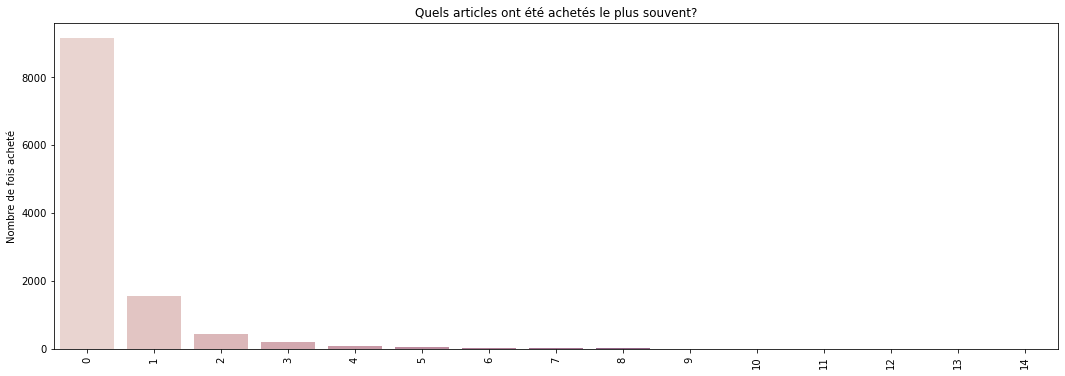

In [34]:
item_counts_2 = items.value_counts().sort_values(ascending=False).iloc[0:15]
item_counts_2.index=[0,1, 2, 3, 4, 5, 6, 7, 8,  9,  10, 11, 12, 13, 14]
plt.figure(figsize=(18,6))
sns.barplot(x=item_counts_2.index, y=item_counts_2.values, data=items, palette=sns.cubehelix_palette(15))
plt.ylabel("Nombre de fois acheté")
plt.title("Quels articles ont été achetés le plus souvent?");
plt.xticks(rotation=90);